<a href="https://colab.research.google.com/github/LeaCarop/California_Housing/blob/main/PMC_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de PMC de regresión con la API secuencial

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [3]:
housing = fetch_california_housing()   # a diferencia del otro dataset, este es más sencillo, solo tiene variables numéricas

# conjunto de entrenamiento, validación y prueba
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)


In [5]:
#  para escalar todas las características y las devuelva en un mismo rango
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [10]:
x_train.shape

(11610, 8)

In [25]:
# CREAR MODELO

model = keras.models.Sequential([
                                 keras.layers.Dense(35, activation="relu", input_shape= x_train.shape[1:]),
                                 keras.layers.Dense(1)  # una solo neurona de salida porque solo se quiere predecir un valor y no es necesaria una función de activación
])

In [38]:
# COMPILAR EL MODELO

model.compile(loss="mse", optimizer="sgd")

# ENTRENAMIENTO

history = model.fit(x_train, y_train, epochs=35, batch_size = 32,
                    validation_data= (x_valid, y_valid))

Epoch 1/35
363/363 [==============================] - 2s 3ms/step - loss: 0.2909 - val_loss: 0.2865
Epoch 2/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2884 - val_loss: 0.2919
Epoch 3/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2861 - val_loss: 0.2925
Epoch 4/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2885 - val_loss: 0.2926
Epoch 5/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2916 - val_loss: 0.2929
Epoch 6/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2873 - val_loss: 0.2868
Epoch 7/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2862 - val_loss: 0.2916
Epoch 8/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2879 - val_loss: 0.2831
Epoch 9/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2855 - val_loss: 0.2792
Epoch 10/35
363/363 [==============================] - 1s 2ms/step - loss: 0.2864 - val_loss: 0.3153

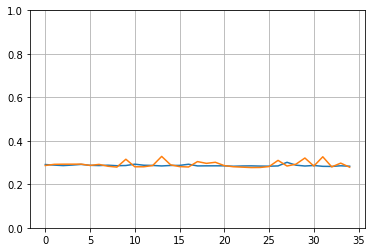

In [39]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2963


In [42]:
x_new = x_test[:4]
y_hat = model.predict(x_new)
y_hat

array([[0.3756429],
       [1.1484895],
       [4.724623 ],
       [2.4637656]], dtype=float32)